This code is about three methods for solving ordinary differential equations <br>

1.   Euler's Method
2.   Improved Euler's Method
3.   Runge-Kutta Method

<br>
All three methods are basead on Taylor<br>
**Euler's Method** trunc Taylor Series in the second derivative:<br><br>
$f(x) = f(x_{0}) + (x-x_{0}).f'(x_{0})$
<br><br>For two parameters (x e y):<br><br>
$f(x) = f(x_{0}) + (x-x_{0}).f'(x_{0}, y_{0})$
<br><br>Normally the initial value problem reports the value of y when x = 0. So we can improve to:
<br><br>
$f(x) =y_{0} + (x-x_{0}).f'(x_{0}, y_{0})$
<br><br>
For interactions, the equation is:<br><br>
$y_{n} =y_{n-1} + h.f'(x_{n-1}, y_{n-1}); h = (x_{n} - x_{n-1}) = constant$<br><br>
The Improved Euler's Method changes some things to decrease the error:<br><br>
$y_{n} =y_{n-1} + h.({f'(x_{n-1}, y_{n-1}) + f'(x_{n-1} + h, y_{n-1} + h.y_{n-1}}))/2$
<br><br>
Runge-Kutta Method is the most accurate of the three. 
there are different versions of this method, 
with different matrices of coefficients. 
The classical is the fourth order Runge-Kutta method. The coefficients are
:<br><br>
$k_{1} = f(x_{n-1},y_{n-1})$<br>
$k_{2} = f(x_{n-1} + (h/2),y_{n-1}+ (h/2) * k_{1})$<br>
$k_{3} = f(x_{n-1} + (h/2),y_{n-1}+ (h/2) * k_{2})$<br>
$k_{4} = f(x_{n-1} + h,y_{n-1} + h*k_{3})$<br>

<br>
Now I'm going to use the methods for this problem:<br>
$f'(x,y) = 4 - x + 2y$<br>


In [0]:
# Packages
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import derivative as d

In [0]:
x = np.linspace(-3,3)
y = x
x0 = 0

def fDerivative(x, y): # The derivative
  return 4 - x + 2*y  
  
def eulerMethod(h = 0.1, a = 0, b = 2, PVI = 1):
  xk = np.arange(a, b + h, h)
  n = len(xk)
  yk = np.zeros(n)
  yk[0] = PVI
  for i in range (1, n):
    yk[i] = yk[i - 1] + h*(fDerivative(xk[i-1], yk[i-1]))
  result = np.array([xk, yk])
  return result

def improvedEulerMethod(h = 0.1, a = 0, b = 2, PVI = 1):
  xk = np.arange(a, b + h, h)
  n = len(xk)
  yk = np.zeros(n)
  yk[0] = PVI
  for i in range (1, n):
    yk[i] = yk[i - 1] + h*(fDerivative(xk[i-1], yk[i-1]) + fDerivative(xk[i-1] + h, yk[i-1] + h*yk[i-1]))/2
  result = np.array([xk, yk])
  return result
    
def rungeKuttaMethod(h = 0.1, a = 0, b = 2, PVI = 1):
  xk = np.arange(a, b + h, h)
  n = len(xk)
  yk = np.zeros(n)
  yk[0] = PVI
  for i in range (1, n):
    k1 = fDerivative(xk[i-1], yk[i-1])
    k2 = fDerivative(xk[i-1] + h/2, yk[i-1] + (h/2)*k1)
    k3 = fDerivative(xk[i-1] + h/2, yk[i-1] + (h/2)*k2)
    k4 = fDerivative(xk[i-1] + h, yk[i-1] + (h)*k3)
    yk[i] = yk[i - 1] + h*(k1 + 2*k2 + 2*k3 + k4)/6
  result = np.array([xk, yk])
  return result  

def fOriginal(x): # Original Function
  return -(7/4) + 0.5*x + (11/4)*(np.exp(2*x))

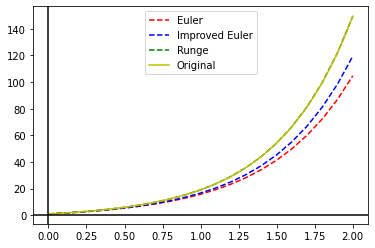

In [21]:
x_original = np.linspace(0, 2)

resultEuler =  eulerMethod()
resultImprovedEuler = improvedEulerMethod()
resultRunge = rungeKuttaMethod()

plt.plot(resultEuler[0], resultEuler[1], 'r--')
plt.plot(resultImprovedEuler[0], resultImprovedEuler[1], 'b--')
plt.plot(resultRunge[0], resultRunge[1], 'g--')
plt.plot(x_original, fOriginal(x_original), 'y')

plt.legend(['Euler', 'Improved Euler', 'Runge', 'Original'])
plt.axvline(0, color='k')
plt.axhline(0, color='k')


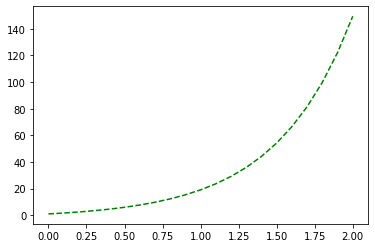

In [22]:
plt.plot(resultRunge[0], resultRunge[1], 'g--')

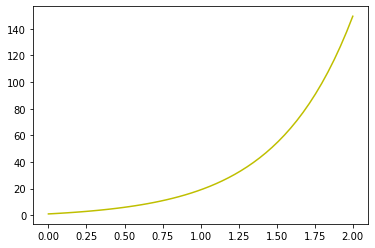

In [23]:
plt.plot(x_original, fOriginal(x_original), 'y')

In [24]:
print('Absolute error:\n')
print('Euler = ', np.sum(np.abs(fOriginal(resultEuler[0]) - resultEuler[1])))
print('\nImproved Euler = ', np.sum(np.abs(fOriginal(resultImprovedEuler[0]) - resultImprovedEuler[1])))
print('\nRunge = ', np.sum(np.abs(fOriginal(resultRunge[0]) - resultRunge[1])))

Absolute error:

Euler =  197.0565662109178

Improved Euler =  134.84438254940227

Runge =  0.029115096380417205


In [25]:
print('Relative error:\n')
print('Euler = ', np.sum(np.abs(fOriginal(resultEuler[0]) - resultEuler[1])/fOriginal(resultEuler[0])))
print('\nImproved Euler = ', np.sum(np.abs(fOriginal(resultImprovedEuler[0]) - resultImprovedEuler[1])/fOriginal(resultImprovedEuler[0])))
print('\nRunge = ', np.sum(np.abs(fOriginal(resultRunge[0]) - resultRunge[1])/fOriginal(resultRunge[0])))

Relative error:

Euler =  3.529473749851242

Improved Euler =  2.527047527581291

Runge =  0.0005050588466531283
